In [1]:
import numpy
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from src.Models.Linear_Regression import Linear_Regression

[diabetes_X, diabetes_y] = datasets.load_diabetes(return_X_y=True)

diabetes_X = numpy.array(diabetes_X[:,2]).reshape([-1, 1])
print(diabetes_X)
diabetes_X = numpy.insert(diabetes_X, 0, 1, axis=1)
print(diabetes_X)
diabetes_y = numpy.array(diabetes_y)

# model = Linear_Regression(int(1E6), 0.006)
# model = model.fit(diabetes_X, diabetes_y)
# 
# predicted_diabetes_y = model.predict(diabetes_X)

CV_model = Linear_Regression()
parameters = {
    "epochs": [1, int(1E3), int(1E4)],
    "learning_rate": [1, 0.5, 0.005, 5E-3],
}
grid_search = GridSearchCV(CV_model, parameters)
grid_search.fit(diabetes_X, diabetes_y)


[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

GridSearchCV(estimator=Linear_Regression(),
             param_grid={'epochs': [1, 1000, 10000],
                         'learning_rate': [1, 0.5, 0.005, 0.005]})

In [2]:
print(grid_search.best_params_)
predicted_diabetes_y = grid_search.best_estimator_.predict(diabetes_X)

{'epochs': 10000, 'learning_rate': 1}


<Axes: >

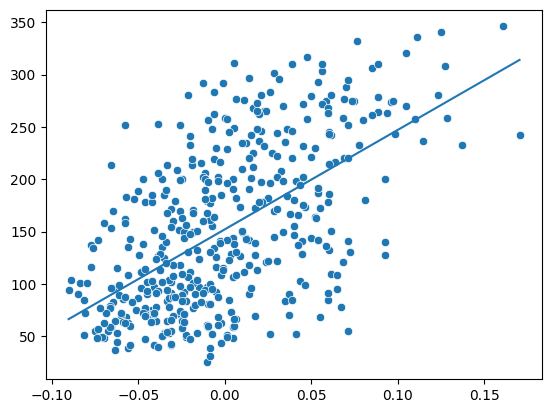

In [3]:
sns.scatterplot(x=diabetes_X[:,1].ravel(), y=diabetes_y)
sns.lineplot(x=diabetes_X[:, 1].ravel(), y=predicted_diabetes_y)